# **AIN 214 - PA2 - FALL 2024**

**Student Number** : 2220765041

**Name Surname**   : Sude Naz Öztürk


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 08.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [78]:
# Import required libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt



# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>




---


***Example Table***:

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| ID       | INTEGER| PK      | Unique identifier table1                 |
| ID2      | INTEGER| FK      | identifier table2                        |
| Name     | TEXT   |         | patient name                             |
| FOREIGN KEY (ID2) REFERENCES table2(ID2)     |    |          |         |







In [79]:
#read csv files
appointmentDf = pd.read_csv("Data/Appointments_procedures.csv")
billingDf = pd.read_csv("Data/Patient_billing.csv")
doctorsDf = pd.read_csv("Data/Doctors.csv")

#connect to db
connection = sqlite3.connect('assignment2.db')
cursor = connection.cursor()

#drop the appointments table if it already exists
cursor.execute('DROP TABLE IF EXISTS Appointments')

#create appointments table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Appointments (
    AppointmentID INTEGER,
    Date1 DATE,
    Time1 TIMESTAMP,
    PatientID INTEGER,
    DoctorID INTEGER,
    ProcedureID INTEGER,
    ProcedureName TEXT,
    PRIMARY KEY(AppointmentID, PatientID, DoctorID, ProcedureID),
    FOREIGN KEY (PatientID) REFERENCES Billing(PatientID),
    FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID)
)
''')

#create billing table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Billing (
    PatientID INTEGER,
    Firstname TEXT,
    Lastname TEXT,
    Email TEXT,
    InvoiceID TEXT,
    Items TEXT,
    Amount TEXT,
    PRIMARY KEY(PatientID, InvoiceID)
)
''')

#create doctors table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Doctors (
    DoctorID INTEGER,
    DoctorName TEXT,
    Specialization TEXT,
    DoctorContact TEXT,
    PRIMARY KEY(DoctorID, DoctorContact)
)
''')

#load datas in dataframe to db
for _, row in appointmentDf.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO Appointments (AppointmentID, Date1, Time1, PatientID, DoctorID, ProcedureID, ProcedureName)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (row['AppointmentID'], row['Date'], row['Time'], row['PatientID'], row['DoctorID'], row['ProcedureID'], row['ProcedureName']))

for _, row in billingDf.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO Billing (PatientID, Firstname, Lastname, Email, InvoiceID, Items, Amount)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (row['PatientID'], row['firstname'], row['lastname'], row['email'], row['InvoiceID'], row['Items'], row['Amount']))

for _, row in doctorsDf.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO Doctors (DoctorID, DoctorName, Specialization, DoctorContact)
        VALUES (?, ?, ?, ?)
    ''', (row['DoctorID'], row['DoctorName'], row['Specialization'], row['DoctorContact']))


# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [80]:
#in where part I connected tables and select part i found total appointments number for each doctor
cursor.execute('''
    SELECT d.DoctorID, d.DoctorName, COUNT(a.AppointmentID) AS total_appointments
    FROM Appointments a, Doctors d
    WHERE a.DoctorID = d.DoctorID
    GROUP BY a.DoctorID
    ORDER BY total_appointments DESC
    LIMIT 5;

''')

#I use this func to see output
results = cursor.fetchall()

for row in results:
    print(f"DoctorID: {row[0]}, DoctorName: {row[1]}, Total Appointments: {row[2]}")


DoctorID: 548, DoctorName: Karlee, Total Appointments: 6
DoctorID: 925, DoctorName: Hyacinthe, Total Appointments: 5
DoctorID: 637, DoctorName: Lorenza, Total Appointments: 5
DoctorID: 527, DoctorName: Cristabel, Total Appointments: 5
DoctorID: 417, DoctorName: Molli, Total Appointments: 5


# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [81]:
cursor.execute('''
    SELECT b.PatientID, b.Firstname, b.Lastname, SUM(b.Amount) AS TotalBilledAmount
    FROM Billing b
    GROUP BY PatientID
    ORDER BY TotalBilledAmount DESC

''')

results = cursor.fetchall()

for row in results:
    print(f"PatientID: {row[0]}, Firstname: {row[1]}, Lastname : {row[2]}, total billed amount: {row[3]}")


PatientID: 733, Firstname: Lesly, Lastname : Arquit, total billed amount: 4035149
PatientID: 368, Firstname: Stephanie, Lastname : Agle, total billed amount: 3436703
PatientID: 779, Firstname: Candi, Lastname : Shaver, total billed amount: 3283643
PatientID: 240, Firstname: Margette, Lastname : Belldas, total billed amount: 2800003
PatientID: 242, Firstname: Frieda, Lastname : Bonilla, total billed amount: 2286000
PatientID: 879, Firstname: Mildrid, Lastname : Bakerman, total billed amount: 2285920
PatientID: 373, Firstname: Asia, Lastname : Bendick, total billed amount: 2281671
PatientID: 804, Firstname: Madelle, Lastname : Camden, total billed amount: 2219170
PatientID: 566, Firstname: Rebeca, Lastname : Winnick, total billed amount: 2213831
PatientID: 546, Firstname: Aimil, Lastname : Suzetta, total billed amount: 2173939
PatientID: 744, Firstname: Averyl, Lastname : Hutchison, total billed amount: 2150565
PatientID: 291, Firstname: Roz, Lastname : Oster, total billed amount: 205834

# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [82]:
cursor.execute('''
    SELECT d.DoctorID, d.DoctorName, a.ProcedureName, MAX(procedureCount) AS procedureCount
    FROM (
        SELECT a.DoctorID, a.ProcedureName, COUNT(a.ProcedureID) AS procedureCount
        FROM Appointments a
        GROUP BY a.DoctorID, a.ProcedureName
    ) AS procedures_per_doctor, Doctors d, Appointments a
    WHERE procedures_per_doctor.DoctorID = d.DoctorID AND
    a.DoctorID = d.DoctorID

    GROUP BY d.DoctorID
    ORDER BY procedureCount DESC;

''')

results = cursor.fetchall()

for row in results:
    print(f"doctorID: {row[0]}, name: {row[1]}, procedure name : {row[2]}, procedure count: {row[3]}")


doctorID: 929, name: Aryn, procedure name : Well-child check-ups, procedure count: 2
doctorID: 925, name: Hyacinthe, procedure name : General health check-ups, procedure count: 2
doctorID: 688, name: Constance, procedure name : EEG (Electroencephalogram), procedure count: 2
doctorID: 637, name: Lorenza, procedure name : Angioplasty and stent placement, procedure count: 2
doctorID: 439, name: Noelle, procedure name : Immunotherapy (allergy shots), procedure count: 2
doctorID: 417, name: Molli, procedure name : Dementia care, procedure count: 2
doctorID: 999, name: Wynne, procedure name : Radiation therapy, procedure count: 1
doctorID: 997, name: Georgina, procedure name : Hormone replacement therapy, procedure count: 1
doctorID: 993, name: Sadie, procedure name : Epidural anesthesia for pain management, procedure count: 1
doctorID: 984, name: Dacia, procedure name : Allergy testing, procedure count: 1
doctorID: 975, name: Hettie, procedure name : LASIK eye surgery, procedure count: 1
do

# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [83]:
cursor.execute('''
    SELECT d.DoctorID, d.DoctorName, SUM(b.Amount) AS TotalRevenue
    FROM Doctors d, Billing b, Appointments a
    WHERE d.DoctorID = a.DoctorID AND
        a.PatientID = b.PatientID
    GROUP BY d.DoctorID

''')

results = cursor.fetchall()

for row in results:
    print(f"doctorID: {row[0]}, name: {row[1]}, total revenue : {row[2]}")


doctorID: 101, name: Mireielle, total revenue : 545986
doctorID: 117, name: Karena, total revenue : 1118905
doctorID: 120, name: Lilith, total revenue : 144746
doctorID: 129, name: Aurelie, total revenue : 2286000
doctorID: 155, name: Alleen, total revenue : 114657
doctorID: 165, name: Monika, total revenue : 699000
doctorID: 181, name: Britte, total revenue : 865126
doctorID: 183, name: Shauna, total revenue : 1485334
doctorID: 189, name: Max, total revenue : 6567286
doctorID: 191, name: Britte, total revenue : 475014
doctorID: 197, name: Ofilia, total revenue : 3172966
doctorID: 203, name: Kore, total revenue : 118150
doctorID: 219, name: Estell, total revenue : 756533
doctorID: 222, name: Zia, total revenue : 144135
doctorID: 224, name: Dorene, total revenue : 2479084
doctorID: 237, name: Suzette, total revenue : 3580216
doctorID: 243, name: Edith, total revenue : 3436703
doctorID: 247, name: Nyssa, total revenue : 50442
doctorID: 254, name: Moyna, total revenue : 545986
doctorID: 2

# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [101]:
cursor.execute('''
    SELECT sub.PatientID, b.Firstname, b.Lastname, sub.AppointmentCount
    FROM (
        SELECT a.PatientID, COUNT(a.AppointmentID) AS AppointmentCount
        FROM Appointments a
        GROUP BY a.PatientID
        HAVING COUNT(a.AppointmentID) > 1
    ) AS sub
    JOIN Billing b ON sub.PatientID = b.PatientID
    ORDER BY sub.AppointmentCount DESC
''')
results = cursor.fetchall()

for row in results:
    print(f"patientID: {row[0]}, first name: {row[1]}, lastname : {row[2]}, appointment count: {row[3]}")


patientID: 870, first name: Carolina, lastname : Carbo, appointment count: 6
patientID: 368, first name: Stephanie, lastname : Agle, appointment count: 5
patientID: 368, first name: Stephanie, lastname : Agle, appointment count: 5
patientID: 368, first name: Stephanie, lastname : Agle, appointment count: 5
patientID: 368, first name: Stephanie, lastname : Agle, appointment count: 5
patientID: 469, first name: Ashlee, lastname : Annabella, appointment count: 5
patientID: 613, first name: Zia, lastname : Wildermuth, appointment count: 5
patientID: 696, first name: Grier, lastname : Noam, appointment count: 5
patientID: 149, first name: Drucie, lastname : Nedrud, appointment count: 4
patientID: 190, first name: Amara, lastname : Sawtelle, appointment count: 4
patientID: 381, first name: Chickie, lastname : Hazlett, appointment count: 4
patientID: 381, first name: Chickie, lastname : Hazlett, appointment count: 4
patientID: 717, first name: Tybie, lastname : Latini, appointment count: 4
pa

# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)

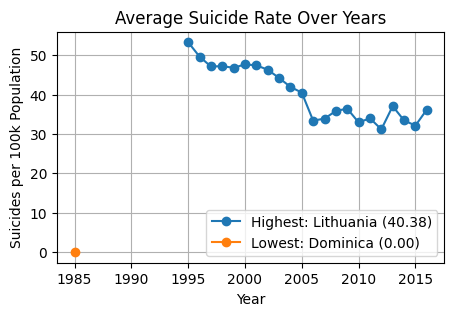

highest average suicide rate: Lithuania (40.38) 
lowest average suicide rate: Dominica (0.00)


In [85]:
suicideDf = pd.read_csv("Data/Suicides.csv")

#create pivot table
pivotTable = suicideDf.pivot_table(values='suicides/100k pop', index='country', columns='year', aggfunc='mean')

#calculate average suicide rate by country across all years
average_suicide_rate_by_country = pivotTable.mean(axis=1)

#find the countries with the highest and lowest average suicide rates
highest_average_suicide_rate_country = average_suicide_rate_by_country.idxmax()
highest_average_rate = average_suicide_rate_by_country.max()
lowest_average_suicide_rate_country = average_suicide_rate_by_country.idxmin()
lowest_average_rate = average_suicide_rate_by_country.min()

#plotting average suicide rates for highest and lowest rate countries
plt.figure(figsize=(5, 3))
plt.plot(pivotTable.columns, pivotTable.loc[highest_average_suicide_rate_country], marker='o', label=f'Highest: {highest_average_suicide_rate_country} ({highest_average_rate:.2f})')
plt.plot(pivotTable.columns, pivotTable.loc[lowest_average_suicide_rate_country], marker='o', label=f'Lowest: {lowest_average_suicide_rate_country} ({lowest_average_rate:.2f})')
plt.title('Average Suicide Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.legend()
plt.grid(True)
plt.show()

#print output
print(f"highest average suicide rate: {highest_average_suicide_rate_country} ({highest_average_rate:.2f}) ")
print(f"lowest average suicide rate: {lowest_average_suicide_rate_country} ({lowest_average_rate:.2f})")

#The plot shows that Lithuania consistently has high suicide rates, while Dominica reports nearly none. This stark contrast likely reflects socioeconomic, cultural, and health differences.



# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

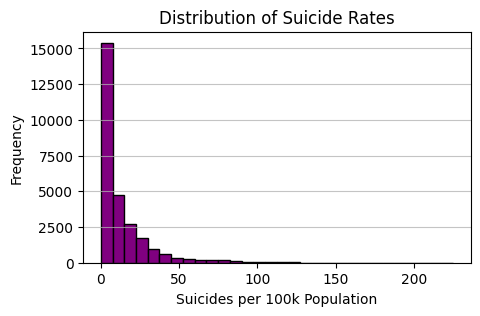

most common range: (-0.226, 7.499]


In [86]:
#create a histogram
plt.figure(figsize=(5, 3))
plt.hist(suicideDf['suicides/100k pop'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Suicide Rates')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#find the most common range of suicide rates
commonRange = suicideDf['suicides/100k pop'].dropna().value_counts(bins=30).idxmax()

#print output
print("most common range: " + str(commonRange))

#The histogram shows that most countries have relatively low suicide rates, while a few exhibit much higher rates. This suggests the need for targeted interventions for high-rate countries and broader preventive measures.



# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

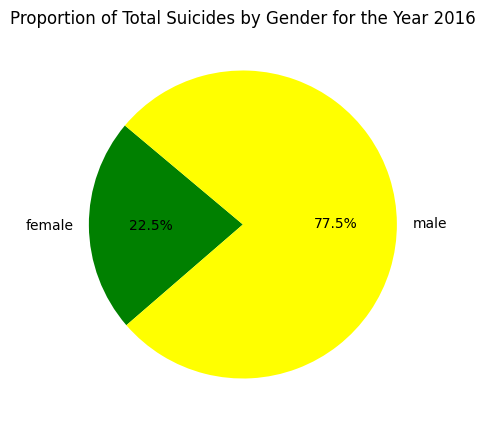

sex
female     3504
male      12099
Name: suicides_no, dtype: int64

In [87]:
#find the most recent year in the dataset
mostRecentYear = suicideDf['year'].max()

#find most recent year
recentYearData = suicideDf[suicideDf['year'] == mostRecentYear]

#group by gender and find the sum of total suicides for each gender
genderSuicideTotals = recentYearData.groupby('sex')['suicides_no'].sum()

#plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(genderSuicideTotals, labels=genderSuicideTotals.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow'])
plt.title(f'Proportion of Total Suicides by Gender for the Year {mostRecentYear}')
plt.show()

#print total suicades for each gender
genderSuicideTotals

#The pie chart shows that males have a significantly higher proportion of suicides than females, reflecting global trends. This suggests men may face unique challenges or pressures, highlighting the need for targeted prevention strategies.


# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

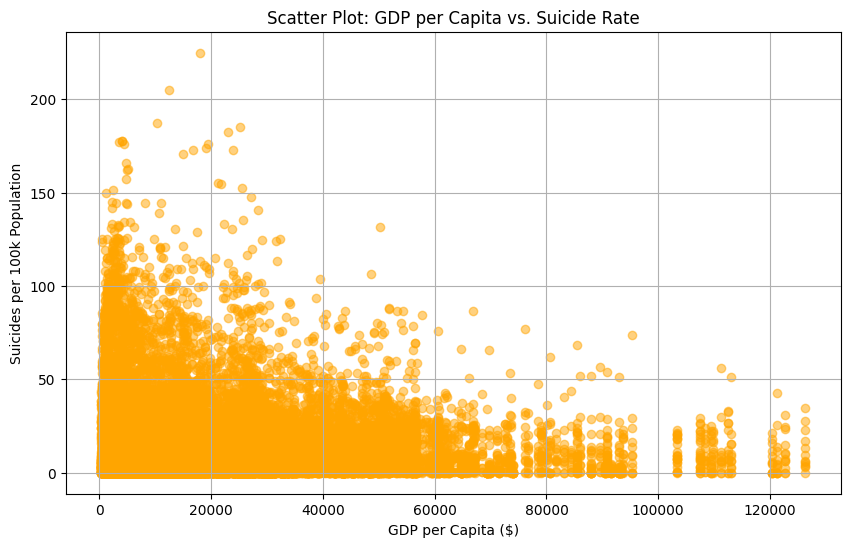

the correlation between GDP per capita and suicide rate: 0.0017851337973438003


In [88]:
#create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(suicideDf['gdp_per_capita ($)'], suicideDf['suicides/100k pop'], alpha=0.5, color='orange')
plt.title('Scatter Plot: GDP per Capita vs. Suicide Rate')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.grid(True)
plt.show()

#calculate correlation between gdp per capita and suicide rate
corr = suicideDf[['gdp_per_capita ($)', 'suicides/100k pop']].corr().iloc[0, 1]

print("the correlation between GDP per capita and suicide rate: " + str(corr))

#The scatter plot shows a weak or no linear relationship between GDP per capita and suicide rates, as indicated by a near-zero correlation. This suggests that factors beyond economic wealth, like social support, cultural norms, and mental health services, may significantly influence suicide rates.


# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

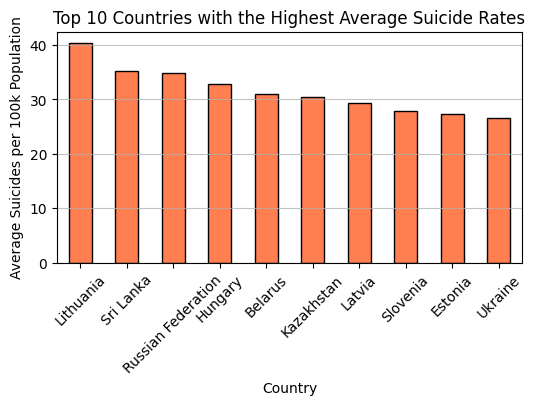

In [89]:
#calculate the average suicide rate by country
average_suicide_rate_by_country = suicideDf.groupby('country')['suicides/100k pop'].mean()

#select the top 10 countries
top_10_countries = average_suicide_rate_by_country.sort_values(ascending=False).head(10)

#plotting the bar chart
plt.figure(figsize=(6, 3))
top_10_countries.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 10 Countries with the Highest Average Suicide Rates')
plt.xlabel('Country')
plt.ylabel('Average Suicides per 100k Population')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


#The bar chart shows the top 10 countries with the highest suicide rates, indicating significant differences compared to others. These high rates may reflect unique social, economic, or cultural challenges and highlight the need for targeted mental health interventions and policies.

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.